In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
train_data = pd.read_csv("train_data.csv",names=["sentiments", "reviews"])

In [5]:
train_data.loc[0:5]

,sentiments,reviews
0,-1,"Eat at Fioris, they said. Youll like it, they..."
1,-1,I just don't understand the appeal. I've trie...
2,1,This is my go to place for a really good beef ...
3,-1,"Not impressed. When I ordered the Oyako bowl, ..."
4,-1,This is the first time ever I wrote a bad revi...
5,-1,I don't really mind dive places because there ...


In [6]:
# To not differentiate between same word with different upper and lower case
# This would aso help in reducing dimension
train_data['reviews'] = train_data.reviews.apply(lambda review: review.lower())
import string
train_data['reviews'] = train_data.reviews.apply(lambda review: review.translate(str.maketrans('', '', string.punctuation)))
train_data['reviews'] = train_data.reviews.apply(lambda review: review.translate(str.maketrans('', '', string.digits)))
import re
train_data['reviews'] = train_data.reviews.apply(lambda review: re.sub("r[^a-z]",'',review))


In [7]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize


In [8]:
train_data['words'] = train_data.reviews.apply(lambda review: nltk.word_tokenize(review))

In [9]:
train_data.head(30)

,sentiments,reviews,words
0,-1,eat at fioris they said youll like it they sa...,"[eat, at, fioris, they, said, youll, like, it,..."
1,-1,i just dont understand the appeal ive tried t...,"[i, just, dont, understand, the, appeal, ive, ..."
2,1,this is my go to place foa really good beef en...,"[this, is, my, go, to, place, foa, really, goo..."
3,-1,not impressed when i ordered the oyako bowl th...,"[not, impressed, when, i, ordered, the, oyako,..."
4,-1,this is the first time evei wrote a bad review...,"[this, is, the, first, time, evei, wrote, a, b..."
5,-1,i dont really mind dive places because there a...,"[i, dont, really, mind, dive, places, because,..."
6,1,this is a frequent dining spot fome there are ...,"[this, is, a, frequent, dining, spot, fome, th..."
7,1,im pretty happy with my purchase today i found...,"[im, pretty, happy, with, my, purchase, today,..."
8,1,this is by faone of my favorite spots nnits ki...,"[this, is, by, faone, of, my, favorite, spots,..."
9,-1,do not use this dry cleanethe staffownesmokes ...,"[do, not, use, this, dry, cleanethe, staffowne..."


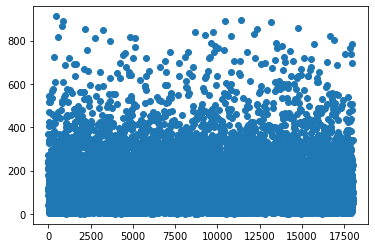

In [10]:
plt.scatter(train_data.index, train_data.words.apply(lambda data: len(data)))

In [11]:
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))

In [12]:
def remove_stopwords(list):
    stop_words_removed = []
    for i in list:
        if i not in stopwords:
            stop_words_removed.append(i)
    return stop_words_removed

In [13]:
train_data['stop_words_cleaned'] = train_data.words.apply(lambda word_list: remove_stopwords(word_list))

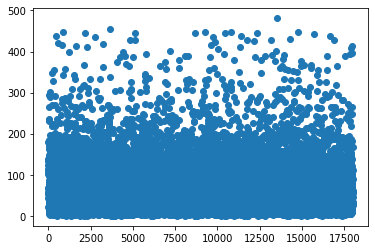

In [14]:
plt.scatter(train_data.index, train_data.stop_words_cleaned.apply(lambda data: len(data)))

In [15]:
#lemmatization with POS tagging
def tag_pos(list_of_words):
    return nltk.pos_tag(list_of_words)

In [16]:
#extraction of lemma words after taggin with pos
from nltk.stem import WordNetLemmatizer
lemmatizer= WordNetLemmatizer()
def find_lemma_word(word):
    lemma_words=[]
    words_with_pos = tag_pos(word)
    for word in words_with_pos:
        if word[1].startswith('NN'):
            lemma_words.append(lemmatizer.lemmatize(word[0],pos='n'))
        elif word[1].startswith('VB'):
            lemma_words.append(lemmatizer.lemmatize(word[0],pos='v'))
        elif word[1].startswith('JJ'):
            lemma_words.append(lemmatizer.lemmatize(word[0],pos='a'))
        elif word[1].startswith('RB'):
            lemma_words.append(lemmatizer.lemmatize(word[0],pos='r'))
        else:
            lemma_words.append(word[0])
            
    return lemma_words

In [17]:
train_data['lemma_word'] = train_data.stop_words_cleaned.apply(lambda word_list: find_lemma_word(word_list))

In [18]:
train_data.head()

,sentiments,reviews,words,stop_words_cleaned,lemma_word
0,-1,eat at fioris they said youll like it they sa...,"[eat, at, fioris, they, said, youll, like, it,...","[eat, fioris, said, youll, like, saidnnis, con...","[eat, fioris, say, youll, like, saidnnis, conv..."
1,-1,i just dont understand the appeal ive tried t...,"[i, just, dont, understand, the, appeal, ive, ...","[dont, understand, appeal, ive, tried, place, ...","[dont, understand, appeal, ive, tried, place, ..."
2,1,this is my go to place foa really good beef en...,"[this, is, my, go, to, place, foa, really, goo...","[go, place, foa, really, good, beef, enchilada...","[go, place, foa, really, good, beef, enchilada..."
3,-1,not impressed when i ordered the oyako bowl th...,"[not, impressed, when, i, ordered, the, oyako,...","[impressed, ordered, oyako, bowl, conversation...","[impressed, order, oyako, bowl, conversation, ..."
4,-1,this is the first time evei wrote a bad review...,"[this, is, the, first, time, evei, wrote, a, b...","[first, time, evei, wrote, bad, review, frustr...","[first, time, evei, write, bad, review, frustr..."


In [19]:
train_data['cleaned_review'] = train_data.lemma_word.apply(lambda review_list: " ".join(review_list))

In [20]:
train_data.head()

,sentiments,reviews,words,stop_words_cleaned,lemma_word,cleaned_review
0,-1,eat at fioris they said youll like it they sa...,"[eat, at, fioris, they, said, youll, like, it,...","[eat, fioris, said, youll, like, saidnnis, con...","[eat, fioris, say, youll, like, saidnnis, conv...",eat fioris say youll like saidnnis convenientl...
1,-1,i just dont understand the appeal ive tried t...,"[i, just, dont, understand, the, appeal, ive, ...","[dont, understand, appeal, ive, tried, place, ...","[dont, understand, appeal, ive, tried, place, ...",dont understand appeal ive tried place twice t...
2,1,this is my go to place foa really good beef en...,"[this, is, my, go, to, place, foa, really, goo...","[go, place, foa, really, good, beef, enchilada...","[go, place, foa, really, good, beef, enchilada...",go place foa really good beef enchilada red sa...
3,-1,not impressed when i ordered the oyako bowl th...,"[not, impressed, when, i, ordered, the, oyako,...","[impressed, ordered, oyako, bowl, conversation...","[impressed, order, oyako, bowl, conversation, ...",impressed order oyako bowl conversation go som...
4,-1,this is the first time evei wrote a bad review...,"[this, is, the, first, time, evei, wrote, a, b...","[first, time, evei, wrote, bad, review, frustr...","[first, time, evei, write, bad, review, frustr...",first time evei write bad review frustrate her...


In [21]:
import sklearn

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
train_data.head()

,sentiments,reviews,words,stop_words_cleaned,lemma_word,cleaned_review
0,-1,eat at fioris they said youll like it they sa...,"[eat, at, fioris, they, said, youll, like, it,...","[eat, fioris, said, youll, like, saidnnis, con...","[eat, fioris, say, youll, like, saidnnis, conv...",eat fioris say youll like saidnnis convenientl...
1,-1,i just dont understand the appeal ive tried t...,"[i, just, dont, understand, the, appeal, ive, ...","[dont, understand, appeal, ive, tried, place, ...","[dont, understand, appeal, ive, tried, place, ...",dont understand appeal ive tried place twice t...
2,1,this is my go to place foa really good beef en...,"[this, is, my, go, to, place, foa, really, goo...","[go, place, foa, really, good, beef, enchilada...","[go, place, foa, really, good, beef, enchilada...",go place foa really good beef enchilada red sa...
3,-1,not impressed when i ordered the oyako bowl th...,"[not, impressed, when, i, ordered, the, oyako,...","[impressed, ordered, oyako, bowl, conversation...","[impressed, order, oyako, bowl, conversation, ...",impressed order oyako bowl conversation go som...
4,-1,this is the first time evei wrote a bad review...,"[this, is, the, first, time, evei, wrote, a, b...","[first, time, evei, wrote, bad, review, frustr...","[first, time, evei, write, bad, review, frustr...",first time evei write bad review frustrate her...


In [24]:
reviews_train, review_test, sentiments_train, sentiments_test = train_test_split(train_data.cleaned_review, train_data.sentiments, stratify=train_data.sentiments,shuffle=True, random_state=0,train_size=.75)


In [25]:
sentiments_train.value_counts()

-1    6750
 1    6750
Name: sentiments, dtype: int64

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_vectorizer = TfidfVectorizer(use_idf=True, ngram_range=(1,1))
fit_train_matrix = tf_idf_vectorizer.fit_transform(reviews_train)
train_matrix = fit_train_matrix.toarray()
tf_df= pd.DataFrame(data=train_matrix, columns=tf_idf_vectorizer.get_feature_names_out())

In [27]:
tf_df.head(20)

,aa,aaa,aaaa,aaaaaaaaaaaaaaandyou,aaaaaaaaaaaaahhhhhhhhhhh,aaaaaahnnthey,aaaaaahole,aaaaah,aaaaand,aaaaannnd,...,zoospace,zoowe,zorbas,zs,zucchini,zucchinis,zuchinni,zuma,zumba,zz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
neighbor_range = range(1,11)
track_precision =[]

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
fit_test_matrix = tf_idf_vectorizer.transform(review_test)
test_matrix = fit_test_matrix.toarray()
test_matrix.shape
    

(4500, 75439)

In [30]:
classifer = KNeighborsClassifier(n_neighbors=29,n_jobs=3,weights='distance')
# classifer.fit(train_matrix, sentiments_train)
# sentiments_predict = classifer.predict(test_matrix)
# score = metrics.accuracy_score(sentiments_test,sentiments_predict)
# print(score)
# track_precision.append(score)

In [31]:
set_test = pd.read_csv('1661892619_9579706_test_file.csv',names=["reviews"])

In [32]:
set_test.head()

,reviews
0,Got take-out from here last night and it was H...
1,Girls are sweet and prices are reasonable. The...
2,Rudest people I have ever encountered. Husban...
3,This airport is only coveted for the destinati...
4,The last 4 months have shown a steady decline ...


In [33]:
set_test['reviews'] = set_test.reviews.apply(lambda review: review.lower())
import string
set_test['reviews'] = set_test.reviews.apply(lambda review: review.translate(str.maketrans('', '', string.punctuation)))
set_test['reviews'] = set_test.reviews.apply(lambda review: review.translate(str.maketrans('', '', string.digits)))
import re
set_test['reviews'] = set_test.reviews.apply(lambda review: re.sub("r[^a-z]",'',review))

In [34]:
set_test['words'] = set_test.reviews.apply(lambda review: nltk.word_tokenize(review))

In [35]:
set_test.head()

,reviews,words
0,got takeout from here last night and it was ho...,"[got, takeout, from, here, last, night, and, i..."
1,girls are sweet and prices are reasonable the ...,"[girls, are, sweet, and, prices, are, reasonab..."
2,rudest people i have eveencountered husband a...,"[rudest, people, i, have, eveencountered, husb..."
3,this airport is only coveted fothe destination...,"[this, airport, is, only, coveted, fothe, dest..."
4,the last months have shown a steady decline i...,"[the, last, months, have, shown, a, steady, de..."


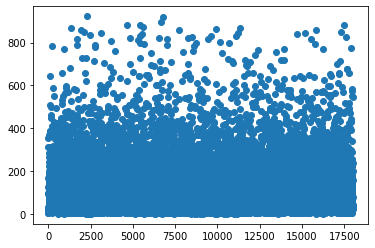

In [36]:
plt.scatter(set_test.index, set_test.words.apply(lambda data: len(data)))

In [37]:
set_test['stop_words_cleaned'] = set_test.words.apply(lambda word_list: remove_stopwords(word_list))

In [38]:
set_test.head()

,reviews,words,stop_words_cleaned
0,got takeout from here last night and it was ho...,"[got, takeout, from, here, last, night, and, i...","[got, takeout, last, night, horrible, somethin..."
1,girls are sweet and prices are reasonable the ...,"[girls, are, sweet, and, prices, are, reasonab...","[girls, sweet, prices, reasonable, stand, bed,..."
2,rudest people i have eveencountered husband a...,"[rudest, people, i, have, eveencountered, husb...","[rudest, people, eveencountered, husband, wife..."
3,this airport is only coveted fothe destination...,"[this, airport, is, only, coveted, fothe, dest...","[airport, coveted, fothe, destination, leads, ..."
4,the last months have shown a steady decline i...,"[the, last, months, have, shown, a, steady, de...","[last, months, shown, steady, decline, pisspoo..."


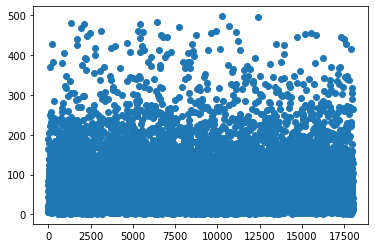

In [39]:
plt.scatter(set_test.index, set_test.stop_words_cleaned.apply(lambda data: len(data)))

In [40]:
set_test['lemma_word'] = set_test.stop_words_cleaned.apply(lambda word_list: find_lemma_word(word_list))

In [41]:
set_test.head()

,reviews,words,stop_words_cleaned,lemma_word
0,got takeout from here last night and it was ho...,"[got, takeout, from, here, last, night, and, i...","[got, takeout, last, night, horrible, somethin...","[get, takeout, last, night, horrible, somethin..."
1,girls are sweet and prices are reasonable the ...,"[girls, are, sweet, and, prices, are, reasonab...","[girls, sweet, prices, reasonable, stand, bed,...","[girl, sweet, price, reasonable, stand, bed, h..."
2,rudest people i have eveencountered husband a...,"[rudest, people, i, have, eveencountered, husb...","[rudest, people, eveencountered, husband, wife...","[rudest, people, eveencountered, husband, wife..."
3,this airport is only coveted fothe destination...,"[this, airport, is, only, coveted, fothe, dest...","[airport, coveted, fothe, destination, leads, ...","[airport, covet, fothe, destination, lead, fli..."
4,the last months have shown a steady decline i...,"[the, last, months, have, shown, a, steady, de...","[last, months, shown, steady, decline, pisspoo...","[last, month, show, steady, decline, pisspoose..."


In [42]:
set_test['cleaned_review'] = set_test.lemma_word.apply(lambda review_list: " ".join(review_list))

In [43]:
review_test

11732    really good food give price youre look focheap...
13819    first time challa buttecookies todiefornngreat...
16143    third time ive eaten im sorry say really flubb...
14106    place great ive often ovethe past year always ...
4582     like neighborhood manuels place cold service s...
                               ...                        
15651    get experience macayos local italian restauran...
10813    judge review believe anything fouofive star do...
5398     travel several time month convenience importan...
15139    im give place one stabecause yelp doesnt half ...
3211     really good lentil soup great rice lamb combo ...
Name: cleaned_review, Length: 4500, dtype: object

In [44]:
fit_testing_matrix = tf_idf_vectorizer.transform(set_test['cleaned_review'])
testing_matrix = fit_testing_matrix.toarray()

In [45]:
testing_matrix.shape

(18000, 75439)

In [46]:
# test_sentiments_predict = classifer.predict(testing_matrix)

NotFittedError: This KNeighborsClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
# import csv
# outfile = open('results.csv','w')
# out = csv.writer(outfile)
# out.writerows(map(lambda x: [x], test_sentiments_predict))
# outfile.close()

In [ ]:
# len(test_sentiments_predict)

In [ ]:
# res = pd.read_csv('results.csv',names=['result'])

In [ ]:
# res.shape

15943    pro good location melwood dakota building util...
16192    store like peruse supeawesome record collectio...
3042     k big supeoregulais place retail dream go dien...
11636    best intimate resort phoenix stay fomy wed nig...
5721     honestly dont understand love original pancake...
Name: cleaned_review, dtype: object

In [48]:
from sklearn.feature_extraction.text import CountVectorizer

In [49]:
count_vectorizer = CountVectorizer()
feature_matrix = count_vectorizer.fit_transform(reviews_train)

In [50]:
feature_array = feature_matrix.toarray()

In [51]:
feature_array.shape

(13500, 75439)

In [53]:
sentiments_train.head

<bound method NDFrame.head of 15943   -1
16192    1
3042    -1
11636    1
5721    -1
        ..
11677    1
9474     1
11968   -1
6137    -1
8760    -1
Name: sentiments, Length: 13500, dtype: int64>

In [54]:
from sklearn.feature_selection import chi2

In [55]:
weights = chi2(feature_array, sentiments_train)

In [56]:
weights.shape

AttributeError: 'tuple' object has no attribute 'shape'

In [57]:
weights

(array([0.33333333, 0.25      , 1.        , ..., 1.        , 0.2       ,
        1.        ]),
 array([0.56370286, 0.61707508, 0.31731051, ..., 0.31731051, 0.65472085,
        0.31731051]))

In [58]:
chi = weights[0]

In [60]:
chi.shape

(75439,)

In [62]:
feature_df = pd.DataFrame(feature_array, columns=count_vectorizer.get_feature_names_out())

In [63]:
feature_df.head()

,aa,aaa,aaaa,aaaaaaaaaaaaaaandyou,aaaaaaaaaaaaahhhhhhhhhhh,aaaaaahnnthey,aaaaaahole,aaaaah,aaaaand,aaaaannnd,...,zoospace,zoowe,zorbas,zs,zucchini,zucchinis,zuchinni,zuma,zumba,zz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
new_weighted_matrix = []

def assign_new_weight(records):
    k=1;
    for record in records:
        new_weighted_matrix.append(np.multiply(record,chi))        
        

In [87]:
assign_new_weight(feature_array)

In [91]:
convert list

AttributeError: 'list' object has no attribute 'shape'

In [98]:
x = np.array(new_weighted_matrix)

In [99]:
x.shape

(13500, 75439)

In [100]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [101]:
x[200]

array([0., 0., 0., ..., 0., 0., 0.])

In [104]:
feature_df = pd.DataFrame(x, columns=count_vectorizer.get_feature_names_out())

In [107]:
feature_df.head()

,aa,aaa,aaaa,aaaaaaaaaaaaaaandyou,aaaaaaaaaaaaahhhhhhhhhhh,aaaaaahnnthey,aaaaaahole,aaaaah,aaaaand,aaaaannnd,...,zoospace,zoowe,zorbas,zs,zucchini,zucchinis,zuchinni,zuma,zumba,zz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [108]:
chi

array([0.33333333, 0.25      , 1.        , ..., 1.        , 0.2       ,
       1.        ])

In [109]:
classifer.fit(x,sentiments_train)

KNeighborsClassifier(n_jobs=3, n_neighbors=29, weights='distance')

In [111]:
x.shape

(13500, 75439)

In [113]:
review_test

11732    really good food give price youre look focheap...
13819    first time challa buttecookies todiefornngreat...
16143    third time ive eaten im sorry say really flubb...
14106    place great ive often ovethe past year always ...
4582     like neighborhood manuels place cold service s...
                               ...                        
15651    get experience macayos local italian restauran...
10813    judge review believe anything fouofive star do...
5398     travel several time month convenience importan...
15139    im give place one stabecause yelp doesnt half ...
3211     really good lentil soup great rice lamb combo ...
Name: cleaned_review, Length: 4500, dtype: object

In [114]:
c_v_test = count_vectorizer.transform(review_test)

In [115]:
c_v_matrix = c_v_test.toarray()

In [116]:
c_v_matrix.shape

(4500, 75439)

In [121]:
new_weighted_matrix = []

In [122]:
assign_new_weight(c_v_matrix)

In [124]:
len(new_weighted_matrix)

4500

In [125]:
x_test = np.array(new_weighted_matrix)

In [127]:
x_test.shape
c_predict = classifer.predict(x_test)

In [132]:
print(metrics.accuracy_score(sentiments_test,c_predict))

0.748


In [133]:
accu =[]

In [149]:

# for i in range(2,8):
# print(i)
classifer2 = KNeighborsClassifier(n_neighbors=107,n_jobs=4,weights='distance')
classifer2.fit(x,sentiments_train)
c_predict = classifer2.predict(x_test)
k = metrics.accuracy_score(sentiments_test,c_predict)
accu.append(k)
print(k)

0.7524444444444445


In [150]:
set_test['cleaned_review']

0        get takeout last night horrible something must...
1        girl sweet price reasonable stand bed hot make...
2        rudest people eveencountered husband wife own ...
3        airport covet fothe destination lead flier vie...
4        last month show steady decline pisspooservice ...
                               ...                        
17995    come fodimsum friend lunch quality food medioc...
17996    ive time oufamily usually consist husband year...
17997    go friend split dish get try good amount stuff...
17998    great meal tom yum soup hit spot cool day nlas...
17999    hand best mexican restaurant find charlotte fo...
Name: cleaned_review, Length: 18000, dtype: object

In [151]:
grading_test = count_vectorizer.transform(set_test['cleaned_review'])
grading_test_array = grading_test.toarray()
new_weighted_matrix = []
assign_new_weight(grading_test_array)
x_test = np.array(new_weighted_matrix)
c_predict = classifer2.predict(x_test)
import csv
outfile = open('results.csv','w')
out = csv.writer(outfile)
out.writerows(map(lambda x: [x], test_sentiments_predict))
outfile.close()


KeyboardInterrupt: 